In [1]:
from datasets import Dataset
import matplotlib.pyplot as plt
from tqdm import tqdm

/data02/users/lz/miniconda3/envs/UICoder/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
ds = Dataset.load_from_disk('/data02/users/lz/code/UICoder/datasets/c4-wash/H128-2560_C128-4096_R2/c4-format-marked')

In [12]:
ds

Dataset({
    features: ['image', 'struct', 'style', 'margin', 'color', 'aesthetics', 'score'],
    num_rows: 499
})

100%|██████████| 499/499 [00:06<00:00, 82.35it/s] 


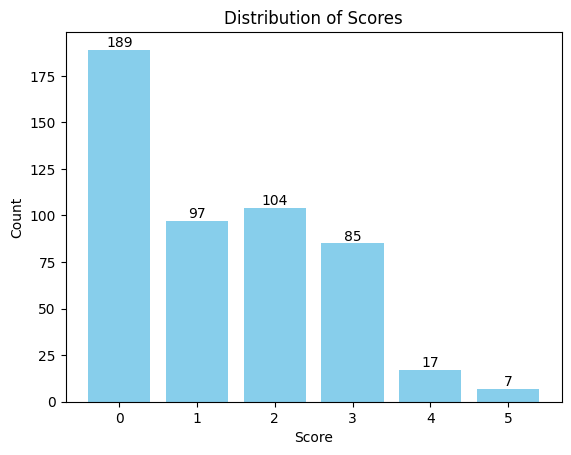

In [13]:
score_counts = {}
for item in tqdm(ds):
    score = item['score']
    if score in score_counts:
        score_counts[score] += 1
    else:
        score_counts[score] = 1

# 提取分数和数量
scores = list(score_counts.keys())
counts = list(score_counts.values())

# 绘制柱状图
plt.bar(scores, counts, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.xticks(scores)

for i in range(len(scores)):
    plt.text(scores[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()